<a href="https://colab.research.google.com/github/younes-code/Happy-house-CNN/blob/main/Happy_house_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [ ]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    print('after',train_y.shape)

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")



befor (600, 64, 64, 3)
befor (600,)
after (1, 600)


In [ ]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.


In [ ]:
# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T


In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
     

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


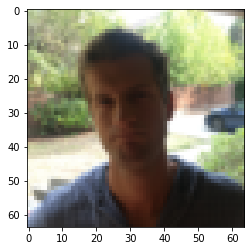

In [ ]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

In [ ]:
#  some variables...
image_height = X_train.shape[1]  
image_width = X_train.shape[2]
num_channels = 3

In [ ]:
# split training set into training and validation
from sklearn.model_selection import train_test_split

X_train2,X_train_val,Y_train2, Y_train_val = train_test_split(X_train, Y_train, test_size=0.1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(image_height, image_width, num_channels)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))
   

model.add(Flatten())

# Densely connected layers
model.add(Dense(128, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compile with adam optimizer & categorical_crossentropy loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
history_model = model.fit(X_train2, Y_train2, 
                    epochs=15, batch_size=64,
                    validation_data=(X_train_val, Y_train_val))

Epoch 1/15
9/9 [==============================] - 7s 691ms/step - loss: 0.7066 - accuracy: 0.5352 - val_loss: 0.7102 - val_accuracy: 0.4167
Epoch 2/15
9/9 [==============================] - 6s 692ms/step - loss: 0.6295 - accuracy: 0.6944 - val_loss: 0.5228 - val_accuracy: 0.7500
Epoch 3/15
9/9 [==============================] - 7s 830ms/step - loss: 0.4806 - accuracy: 0.8074 - val_loss: 0.5191 - val_accuracy: 0.7000
Epoch 4/15
9/9 [==============================] - 7s 730ms/step - loss: 0.3563 - accuracy: 0.8611 - val_loss: 0.2761 - val_accuracy: 0.9000
Epoch 5/15
9/9 [==============================] - 8s 917ms/step - loss: 0.2638 - accuracy: 0.9000 - val_loss: 0.1815 - val_accuracy: 0.9500
Epoch 6/15
9/9 [==============================] - 3s 389ms/step - loss: 0.1839 - accuracy: 0.9370 - val_loss: 0.1235 - val_accuracy: 0.9500
Epoch 7/15
9/9 [==============================] - 4s 393ms/step - loss: 0.1462 - accuracy: 0.9407 - val_loss: 0.1187 - val_accuracy: 0.9667
Epoch 8/15
9/9 [====

# Evaluate / Test

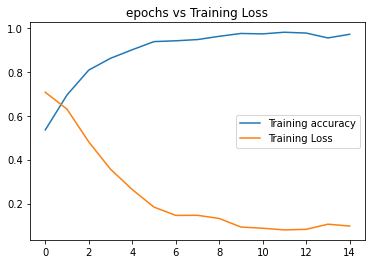

In [ ]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [ ]:
# Code Here
test_loss, test_accuracy = model.evaluate(X_test , Y_test , batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

3/3 [==============================] - 0s 97ms/step - loss: 0.1282 - accuracy: 0.9600
Test loss: 0.1282 accuracy: 0.9600


Confusion Matrix

In [ ]:
# get the predictions for the test data
predicted = model.predict(X_test)
test_predictions = np.round(predicted)

5/5 [==============================] - 0s 52ms/step


In [ ]:
print("predicted_classes shape : ", predicted.shape)
print("y_test shape : ", Y_test.shape)


predicted_classes shape :  (150, 1)
y_test shape :  (150, 1)


In [ ]:
cm=confusion_matrix(Y_test , test_predictions)


In [ ]:
print(cm)

[[64  2]
 [ 4 80]]


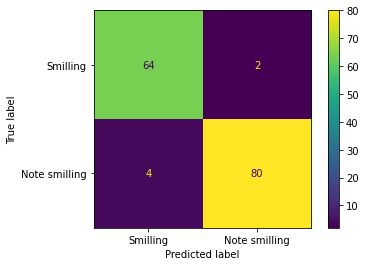

In [ ]:
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Smilling', 'Note smilling'])
cmd_obj.plot()

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


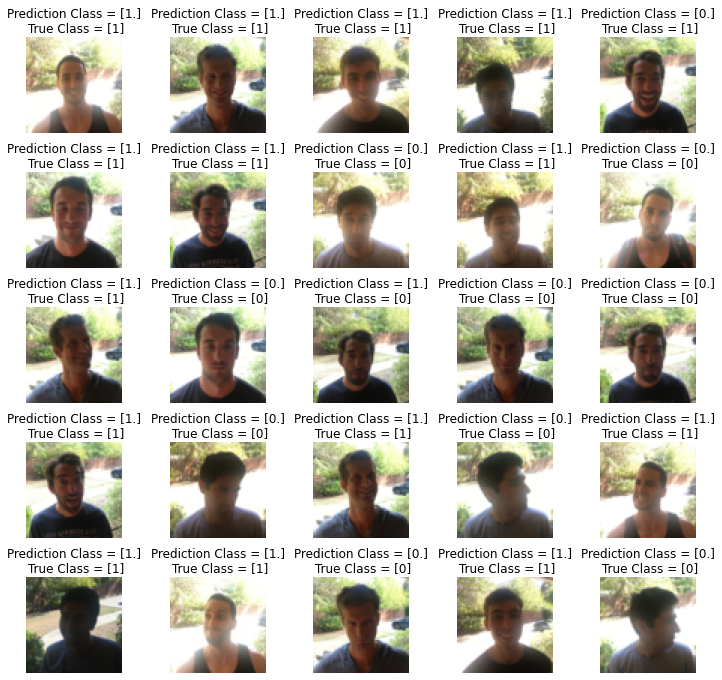

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(test_predictions[i], Y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)